In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph, Graph
params, section = ['name', 'sequence', 'optional', 'quality'], 4
fn = '6/s_6.first1000.fastq'#'6/s_6.first10000.fastq'#

In [73]:
class Graph():
    def __init__(self):
        # this initiates the graph class
        self.graph = {}
        self.nodes = {}
        self.edgeWeights = {}
    
    def add_vertex(self, node_str):
        # this adds node as a vertex to graph
        if node_str not in self.nodes:
            node = Node(node_str)
            self.nodes[node_str] = node
            self.graph[node] = []
            return node
        else: return self.nodes[node_str]
    
    def get_nodes(self):
        return list(self.nodes.keys())
    
    def vertex_degree(self, node):
        # gets the number of edges stemming out from a given node
        return len(self.graph[node])
    
    def add_edge(self, node1, node2):
        # adds an edge between node1 and node2
        prefix_node = self.add_vertex(node1)
        suffix_node = self.add_vertex(node2)
        self.graph[prefix_node] += [suffix_node]
        index = prefix_node.get_value() + suffix_node.get_value()[-1]
        self.edgeWeights[index] = self.edgeWeights.get(index, 0) + 1
        # add length to each time that this weight is updated.
    
    def get_edgeW(self, edge):
        return self.edgeWeights[edge]
    
    def get_edges(self):
        for node, value in self.graph.items():
            for suffix_node in value:
                yield (node.get_value(), suffix_node.get_value())
    
    def is_connected(self, node1, node2):
        # this checks if two vertices are connected
#         return (node2 in self.graph[node1] or node1 in self.graph[node2])
        prefix_node = self.add_vertex(node1)
        suffix_node = self.add_vertex(node2)
        return suffix_node in self.graph[prefix_node]
    
    def node_is_conn(self, node):
        suffix_node = self.add_vertex(node)
        count = [1 for n, value in self.graph.items() if suffix_node in value]
        return sum(count) > 0
        
    def get_graph(self):
        return {k.get_value():[v.get_value() for v in value] for k, value in self.graph.items()}
    
    def num_subgraphs(self):
        all_nodes = self.get_nodes()
        subgraphs, j = {}, 0
        visited = [False] * len(all_nodes)
        
        while sum(visited) < len(all_nodes):
            for i in all_nodes:
                if not self.node_is_conn(i) and visited[all_nodes.index(i)]==False:
                    queue = [i]
                    visited[all_nodes.index(i)] = True
                    break
            while queue:
                prefix_node = self.add_vertex(queue.pop(0))
                for i in self.graph[prefix_node]:
                    index = all_nodes.index(i.get_value())
                    if visited[index] == False:
                        visited[index] = True
                        queue.append(i.get_value())
                subgraphs.setdefault(j, []).append(prefix_node.get_value())
            j += 1
        return subgraphs

class Node():
    def __init__(self, value=None):
        self.value = value
        
    def get_value(self):
        return self.value

class BruijnGraph(Graph):
    def __init__(self):
        self.graph = {}
        self.nodes = {}
        self.edgeWeights = {}
    
    def make_graph(self, genome, k=3):
        for kmer in kmer_generator(genome, k):
            nodes = [i for i in kmer_generator(kmer, k-1)]
            self.add_edge(nodes[0], nodes[1])

class condensed_BruijnGraph(BruijnGraph):
    def make_condensed(self):
        for i in all_nodes:
            if self.graph[i] 
        # find all edge weights greater than 1
        for i, v in self.edgeWeights.items():
            if v > 1:
                prefix_node, suffix_node = i[:-1], i[1:]
        
        suffix_node = self.add_vertex(node2)
        self.graph[prefix_node] += [suffix_node]
        index = prefix_node.get_value() + suffix_node.get_value()[-1]
        self.edgeWeights[index] = self.edgeWeights.get(index, 0) + 1
    

In [70]:
def get_reads(fn):
    with open(fn, 'r') as file:
        lines = []
        for line in file:
            lines.append(line.rstrip())
            if len(lines) == section:
                record = {k: v for k, v in zip(params, lines)}
                lines = []
                yield record['sequence']

# write k-mer of graph
def kmer_generator(genome, k=3):
    i = 0
    while i + k <= len(genome):
        kmer = genome[i:i+k]
        yield kmer
        i += 1

In [93]:
k, j = 3, 0
reads = {}
# genome = ['TAATGCCATGGGATGTT', 'TAATGTGGGATGCCTTAAT']
genome = ['ACGTCCGTAA']
graph = BruijnGraph()
for genome in genome: #get_reads(fn): #
    graph.make_graph(genome, k)
    for edge, count in graph.edgeWeights.items():
        reads[edge] = reads.get(edge, []) + [count]
    j += 1
avg_reads = {k:sum(v)/j for k, v in reads.items()}
sum_reads = {k:sum(v) for k, v in reads.items()}

def simplify_graph(self, avg_coverage):
    new_edges = []
    for edge, count in graph.edgeWeights.items():
        if avg_reads[edge] > avg_coverage:
            new_edges.append(edge)
    return new_edges

In [97]:
all_edges = [(i,v) for i, v in graph.get_edges()]
all_nodes = graph.get_nodes() #[i for i, v in graph.get_edges() if v is None]
dot = Digraph(format='png')
dict_keys = {all_nodes[i]:str(i) for i in range(len(all_nodes)) }
# dict_keys = {all_nodes[i]:chr(i+65) if i < 26 else chr(i+72) for i in range(len(all_nodes)) }
# [dot.node(dict_keys[i], i) for i in all_nodes] #for i, v in graph.get_edges() if v is None]
# edges = [(dict_keys[i], dict_keys[v]) for i, v in graph.get_edges() if v is not None]
[dot.edge(dict_keys[i], dict_keys[v], 
          label=i+v[-1]+ ' (' +str(graph.get_edgeW(i+v[-1]))+')'+str(avg_reads[i+v[-1]]))\
                                                         for i, v in graph.get_edges() if v is not None]
# # [dot.edge(dict_keys[i], dict_keys[v]) for i, v in graph.get_edges() if v is not None]
# dot.edges(edges)
dot.render('graph3', view=True)

'graph3.png'

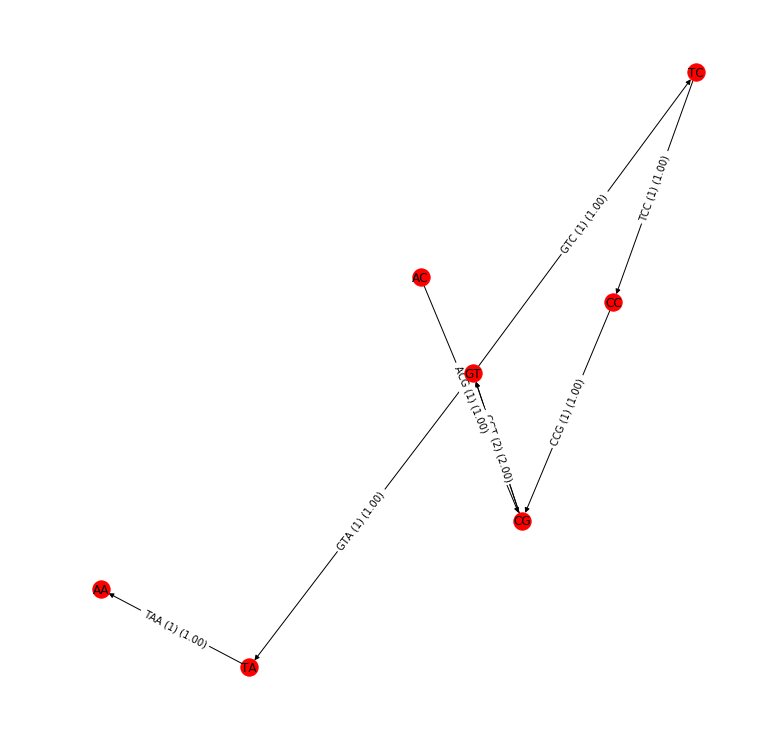

In [94]:
DG = nx.MultiDiGraph()
all_edges = [(i,v) for i, v in graph.get_edges() if v is not None]
# all_nodes = [i for i, v in graph.get_edges() if v is None]
# DG.add_nodes_from(all_nodes)
DG.add_edges_from(all_edges)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(DG,scale=2)
nx.draw(DG, pos, with_labels=True)
nx.draw_networkx_edge_labels(DG, pos=pos, edge_labels={i:i[0]+i[1][-1]+' ('+str(graph.get_edgeW(i[0]+i[1][-1]))\
                                + ')' + ' (' + '{0:.2f}'.format(avg_reads[i[0]+i[1][-1]]) + ')' for i in all_edges})
plt.show()
# [DG.add_edge(all_edges[i][0], all_edges[i][1]) for i in range(len(all_edges))]
# DG.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
# DG.graph['graph'] = {'scale': '3'}
# A = to_agraph(DG) 
# A.layout('dot')                                                                 
# A.draw('multi1.png')

In [134]:
from networkx.drawing.nx_agraph import write_dot
write_dot(DG,'multi.dot')
!neato -T png multi.dot > multi.png

In [76]:
len(avg_reads)

1642

In [77]:
a = graph.num_subgraphs() 

CCGGCGGTGAAACCTGCCATCAGCACCATGTGATCAGCCGGAATGCGGCTTGCC
AATCGGCGCGTAAACAGGCAGCCAGCACCGCAGCAGAGTAGTCGGAACCGTTGC
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAG
GGCGGGTGGACTCAGCAATATCGACGGTAGATTCGAGGTAATGCCCCACTGCCA


In [87]:
len(reads)

1642

In [83]:
len(a[0]), len(a[1]), len(a[2]), len(a[3])

(14, 84, 843, 705)

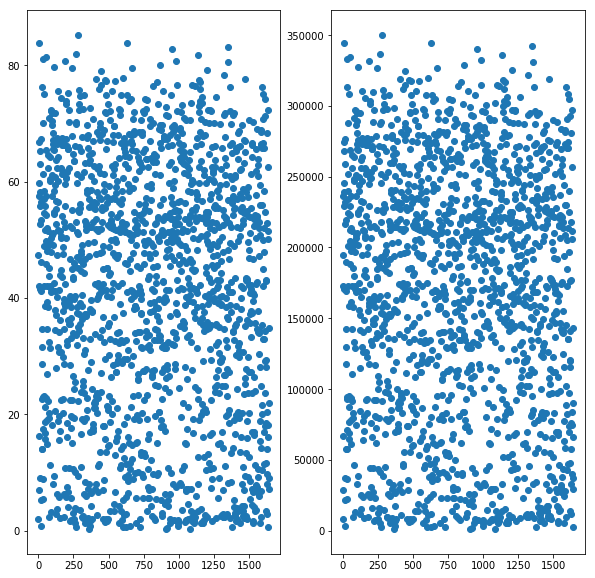

In [92]:
# distribution of edge length and coverage as a function of count
edge_coverage, edge_length = avg_reads.values(), sum_reads.values()
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.scatter(list(range(len(edge_coverage))), edge_coverage)
plt.subplot(1, 2, 2)
plt.scatter(list(range(len(edge_length))), edge_length)
plt.show()

In [98]:
graph.edgeWeights.items()

dict_items([('CCG', 1), ('ACG', 1), ('TAA', 1), ('GTA', 1), ('CGT', 2), ('GTC', 1), ('TCC', 1)])